In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
class read_plot:
    def __init__(self, files):
        self.files =files #files is a list of files 
    
    def output(self):
        self.read(self.files)
        
    def read(self, files):
        files_df = {}
        for i in range(len(files)):    
            files_df['df_' + str(i)] = pd.read_csv('./data/' + files[i], delimiter = ' ', header = None, names = ['residue_number', 'accessibility'])
        self.merge(list(files_df.keys()), files_df)
    
    def merge(self, ls_df, files_df):
        merge_df = files_df[ls_df[0]][['residue_number', 'accessibility']].copy()
        merge_df['accessibilty' + str(1) ] = files_df[ls_df[1]]['accessibility']
        merge_df['accessibilty' + str(2) ] = files_df[ls_df[2]]['accessibility']
        self. calc(merge_df)
    
    def calc(self, merge_df):
        merge_df['Avg_accessibility'] = merge_df.loc[:,['accessibility', 'accessibilty1', 'accessibilty2']].mean(axis = 1)
        std  = merge_df['Avg_accessibility'].std()
        print('Standard Deviation: ', std)
        self.plot(merge_df)
        
    def plot(Self, merge_df):
        x = merge_df['residue_number']
        y = merge_df['Avg_accessibility']

        fig, ax = plt.subplots(figsize=(20, 10),)
        ax.plot(x, y, color='red', linewidth=1, linestyle='-',label='test') 
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymin=0)


        ax.set_xlabel('residue_number') # Add an x-label to the axes. 
        ax.set_ylabel('Accessibility')  # Add a y-label to the axes.

        ax.set_title('add_title')  # Add a title to the axes.
        ax.legend(loc='best')

        #fig.savefig('output/' + self.out_filename +'.png')
        plt.show()


Standard Deviation:  0.37106310601828885


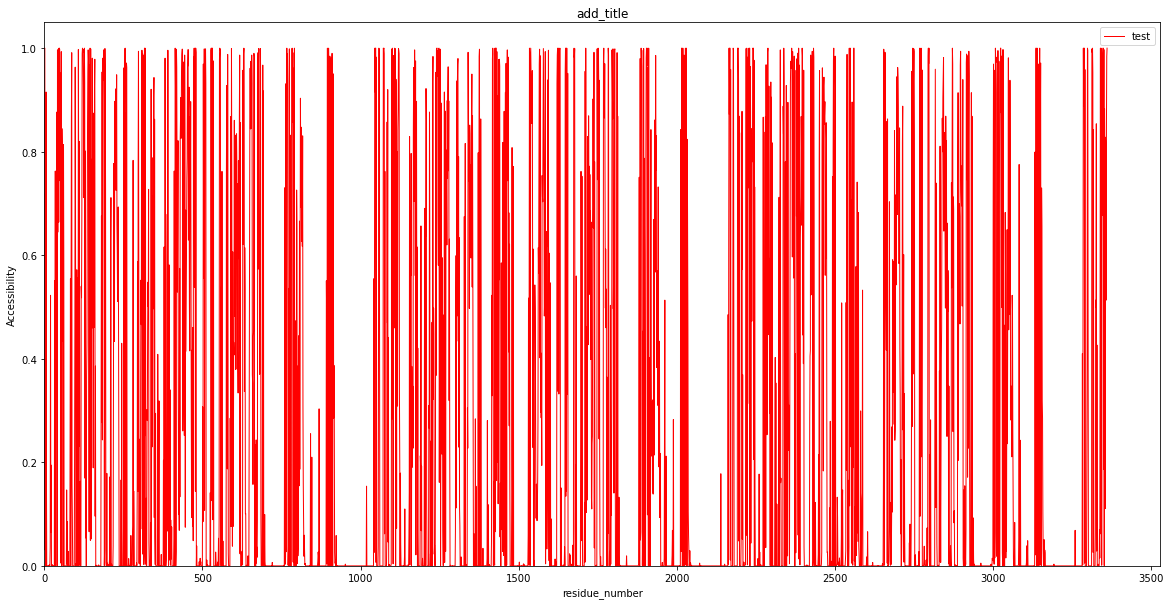

Standard Deviation:  0.292387725868627


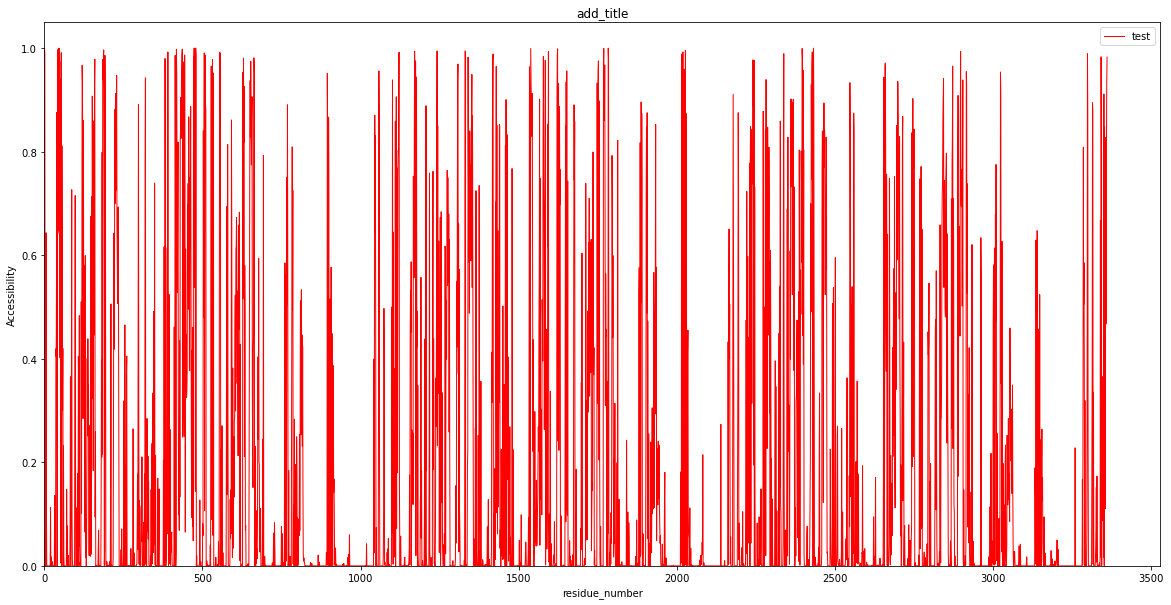

In [20]:
files1 = ['5.0.5.SiteSpecific.n.csv', '5.1.5.SiteSpecific.n.csv', '5.2.5.SiteSpecific.n.csv']
files2 = ['5.0.5.SiteSpecific.csv', '5.1.5.SiteSpecific.csv', '5.2.5.SiteSpecific.csv']

t1 = read_plot(files1)
t1.output()

t1 = read_plot(files2)
t1.output()

